# LEC - Summer 2022 Analysis

Analysis of the player data of the LEC (League of Legends European Championship) for the summer 2022 split. The League of Legends European Championship (LEC) is the professional League of Legends esports league run by Riot Games in Europe, in which ten teams compete. The data is collected from 17th June 2022 to 14th August 2022.

READ ME:

OS used: Windows 11
IDE: Jupyter (Anaconda)

To run:
- This file is an ipynb python notebook.
- Ensure that the data excels like LEC2022Summer.csv , LECSummer2022Results.csv, LECSummer2022Streams are in the same folder as the python file.
- Run the python notebook as normal in jupyter.

Important terms included at the end of read me document


In [31]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np
from tabulate import tabulate
import statistics

In [32]:
#Read the data from the csv file
lec_data = pd.read_csv("LEC2022Summer.csv")
print("Type of the dataset:", type(lec_data))
display(HTML(lec_data.to_html()))

print(lec_data.shape)

Type of the dataset: <class 'pandas.core.frame.DataFrame'>


,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,KP,KS%,DTH%,FB%,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,D%P15,EGPM,GOLD%,STL,WPM,CWPM,WCPM
0,Agresivoo,Team BDS,Top,18,17%,71%,30,53,72,1.9,59.6%,17.5%,19.8%,17%,-194,-2,-1.8,7.9,26.3%,422,23.1%,20.5%,223,22.8%,0,0.39,0.17,0.17
1,Alphari,Team Vitality,Top,19,47%,26%,41,37,88,3.5,54.0%,17.2%,15.6%,26%,420,238,10.3,8.3,26.4%,515,23.2%,20.5%,261,23.0%,0,0.45,0.13,0.18
2,Armut,MAD Lions,Top,18,67%,39%,51,42,101,3.6,58.9%,19.8%,21.2%,22%,257,66,3.4,8.1,24.4%,495,24.7%,22.9%,276,23.1%,1,0.49,0.19,0.20
3,BrokenBlade,G2 Esports,Top,18,67%,33%,61,38,124,4.9,63.4%,20.9%,18.2%,28%,-1,-18,-2.8,8.4,27.1%,559,24.6%,21.9%,295,24.2%,0,0.47,0.18,0.17
4,caPs,G2 Esports,Middle,18,67%,50%,77,56,123,3.6,68.5%,26.4%,26.8%,22%,-42,-91,1.0,8.5,24.8%,645,28.6%,29.3%,283,23.3%,0,0.38,0.08,0.24
5,Carzzy,Team Vitality,ADC,19,47%,47%,56,50,105,3.2,67.4%,23.4%,21.1%,11%,-317,-62,-10.8,7.7,27.1%,685,30.2%,32.1%,270,24.2%,1,0.62,0.12,0.36
6,Cinkrof,Team BDS,Jungle,18,17%,35%,24,60,91,1.9,67.3%,14.0%,22.4%,44%,-20,-114,0.1,5.1,13.8%,237,12.6%,12.8%,161,16.6%,1,0.45,0.36,0.47
7,Comp,Rogue,ADC,18,61%,39%,82,33,99,5.5,79.0%,35.8%,16.1%,17%,147,-91,2.7,9.4,32.5%,626,27.5%,30.3%,325,27.8%,1,0.51,0.13,0.37
8,Dajor,Astralis,Middle,18,39%,67%,51,48,97,3.1,69.8%,24.1%,20.7%,17%,-158,-35,-5.7,8.7,27.5%,554,25.2%,25.5%,267,24.2%,0,0.39,0.17,0.19
9,Elyoya,MAD Lions,Jungle,18,67%,50%,52,41,137,4.6,73.3%,20.2%,20.7%,44%,182,115,2.7,5.4,15.5%,288,14.4%,14.3%,204,17.4%,1,0.41,0.40,0.50


(53, 28)


### Dimensions

No of rows = 53 => 53 players in the dataset,
No of columns = 28

### Key for column values

GP - Games Played,
W% - Win Percentage,
CTR% - Counter pick rate,
KDA - Calculated from total kills, deaths, assists (Here, KDA = (total kills+total assists)/total deaths),
KP - Kill participation,
KS% - % of kills,
DTH% - Average share of team's deaths,
FB% - First blood rate,
GD10 - Gold difference at 10,
XPD10 - XP difference at 10
CSD10 - Creep score difference at 10,
CSPM - Creep score per minute,
CS%P15 - Average percent of team's total cs post 15 mins,
DPM - Damage to champions per minute,
DMG% - Average share of team's damage to champions,
D%P15 - Average percent of team's total damage to champs post 15 mins,
EGPM - Earned gold per minute,
GOLD% - Avg share of team's total gold,
STL - Neutral objectives stolen,
WPM - Wards/min,
CWPM - Control wards/min,
WCPM - Ward clear/min

# Q1 :Picking out the best stats
In the next section, we will attempt to isolate the best stat values for each column. For some columns, a higher value is preferred (Eg: Kills, Assists), whereas for others, a lower value is preferred (Eg: Deaths).

In [33]:
#Some common functions

#Find the best min/max value for numeric columns
def findExtremeValueInNumericColumn(colName,ext):
    value = max(lec_data.loc[:,colName]) if ext=="max" else min(lec_data.loc[:,colName])
    #print("Value",value)
    temp = []
    for ind, x in lec_data.iterrows():
        if(lec_data.loc[ind, colName] == value and (len(temp)%6==0) and len(temp)>0):
            temp.append(lec_data.loc[ind, "Player"] + "\n")
        elif(lec_data.loc[ind, colName] == value):
            temp.append(lec_data.loc[ind, "Player"])
    return temp

#Find the best min/max value for string columns
def findExtremeValueInPercentageColumn(colName,ext):
    limit = 999 if ext=="min" else 0    
    value = limit
    for ind, y in lec_data.iterrows():
        cut_string= lec_data.loc[ind, colName].replace('%','')
        float_value = float(cut_string)
        if ext=="min":
            if float_value < value:
                value = float_value
        else:
            if float_value > value:
                value = float_value
    
    #print("Value",value)
    temp = []
    for ind, x in lec_data.iterrows():
        ds_cut_string = lec_data.loc[ind, colName].replace('%','')
        ds_float_value = float(ds_cut_string)
        if ds_float_value == value and (len(temp)%6==0) and len(temp)>0:
            temp.append(lec_data.loc[ind, "Player"] + "\n")
        elif ds_float_value == value:
            temp.append(lec_data.loc[ind, "Player"])
    return temp

In [34]:
# Calculate and display best numbers for each column

#Displaying the best stats
#Making a table to view easily

top_stats = [
                ["GP","Max",', '.join(findExtremeValueInNumericColumn("GP","max"))],
                ["K","Max",', '.join(findExtremeValueInNumericColumn("K","max"))],
                ["D","Min",', '.join(findExtremeValueInNumericColumn("D","min"))],
                ["A","Max",', '.join(findExtremeValueInNumericColumn("A","max"))],
                ["KDA","Max",', '.join(findExtremeValueInNumericColumn("A","max"))],
                ["GD10","Max",', '.join(findExtremeValueInNumericColumn("GD10","max"))],
                ["XPD10","Max",', '.join(findExtremeValueInNumericColumn("XPD10","max"))],
                ["CSD10","Max",', '.join(findExtremeValueInNumericColumn("CSD10","max"))],
                ["CSPM","Max",', '.join(findExtremeValueInNumericColumn("CSPM","max"))],
                ["DPM","Max",', '.join(findExtremeValueInNumericColumn("DPM","max"))],
                ["EGPM","Max",', '.join(findExtremeValueInNumericColumn("EGPM","max"))],
                ["STL","Max",', '.join(findExtremeValueInNumericColumn("STL","max"))],
                ["WPM","Max",', '.join(findExtremeValueInNumericColumn("WPM","max"))],
                ["CWPM","Max",', '.join(findExtremeValueInNumericColumn("CWPM","max"))],
                ["WCPM","Max",', '.join(findExtremeValueInNumericColumn("WCPM","max"))],
                ["W%","Max",', '.join(findExtremeValueInPercentageColumn("W%","max"))],
                ["KS%","Max",', '.join(findExtremeValueInPercentageColumn("KS%","max"))],
                ["DTH%","Min",', '.join(findExtremeValueInPercentageColumn("DTH%","min"))],
                ["FB%","Max",', '.join(findExtremeValueInPercentageColumn("FB%","max"))],
                ["CS%P15","Max",', '.join(findExtremeValueInPercentageColumn("CS%P15","max"))],
                ["DMG%","Max",', '.join(findExtremeValueInPercentageColumn("DMG%","max"))],
                ["D%P15","Max",', '.join(findExtremeValueInPercentageColumn("D%P15","max"))],
                ["GOLD%","Max",', '.join(findExtremeValueInPercentageColumn("GOLD%","max"))]
               ]

print(tabulate(top_stats, headers=["STAT", "CRITERIA", "PLAYERS"],tablefmt="grid"))


+--------+------------+--------------------------------------------------------------+
| STAT   | CRITERIA   | PLAYERS                                                      |
+========+============+==============================================================+
| GP     | Max        | Alphari, Carzzy, Finn, Haru, Humanoid, Hylissang, Irrelevant |
|        |            | , Labrov, Markoon, Mersa, Mikyx, Neon, nukeduck              |
|        |            | , Patrik, Perkz, Razork, Upset, Vetheo, Wunder               |
+--------+------------+--------------------------------------------------------------+
| K      | Max        | UNF0RGIVEN                                                   |
+--------+------------+--------------------------------------------------------------+
| D      | Min        | Gadget                                                       |
+--------+------------+--------------------------------------------------------------+
| A      | Max        | Targamas           

## Best stats - Insights from above:

### Speculations
1. Most teams have a near constant winrate, but misfits players seem to have different ones. Can be attributed to use of substitutes. Supported by the fact that other teams have same number of games played, but misfits don't. (Eg: Vetheo - 19 games, Zanzarah - 8, which explains why Zanzarah has a winrate greater than that of G2/MAD who were first in the groups stage).

### Confirming expectations
1. Max objectives stolen is by a jungler
2. ADCs top the stats related to dmg and cs (K, CSD10, CSPM, DPM, EGPM, KS%, CS%P15, DMG%, D%P15, GOLD%)
3. Ward/min and CWard/min are topped by supports



# Q2: Effect of counter pick rate on kills/KP/KDA

Counter pick rate indicates when the player's champion was picked after their lane opponent. This aims to analyze:
1. Which players got the highest chance to make a counter pick and their roles.
2. On average, which role was allowed to have a lot of counter picks.
3. If counter picks does have an impact on kills/kda, etc as the players believed during champ select that they could be more comfortable against their lane opponent with that champ.

## Charting the players-counter pick %


In [35]:
#Common functions for section
def getFloatFromPercent(ctr_list):
    temp = []
    for itr in ctr_list:
        cut_itr = itr.replace('%','')
        float_itr = float(cut_itr)
        temp.append(float_itr)
    return temp

#Get array of colours for plotting. Codes the points in graph according to the role of the player.
def getColorByRole(pos_data):
    color_array = []
    for x in pos_data:
        color = ""
        if x == "Jungle":
            color_array.append("#66FF66")
        elif x == "ADC":
            color_array.append("#FF3333")
        elif x == "Support":
            color_array.append("#FFFF33")
        elif x == "Middle":
            color_array.append("#66FFFF")
        elif x == "Top":
            color_array.append("#6666FF")
            
    return color_array

<Figure size 432x288 with 0 Axes>

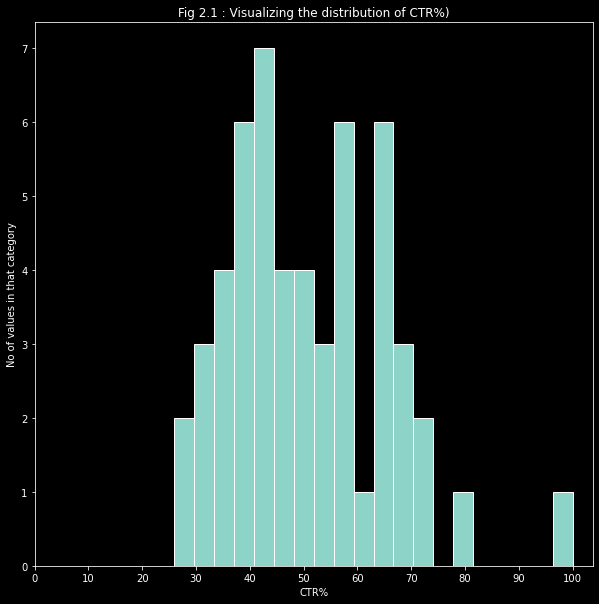

In [36]:
#Plot a histogram to visualize CTR% initially
player_data = np.array(lec_data["Player"].tolist())
ctr_percentages = np.array(getFloatFromPercent(lec_data["CTR%"].tolist()))
team_data = np.array(lec_data["Team"].tolist())

plt.clf()
plt.style.use('dark_background')
plt.figure(figsize=(10,10))
plt.hist(ctr_percentages,20,edgecolor='white')

plt.xticks([0, 10,20,30,40,50,60,70,80,90,100])
plt.title("Fig 2.1 : Visualizing the distribution of CTR%)")
plt.xlabel("CTR%")
plt.ylabel("No of values in that category")

plt.show()

Even though the histogram shows how many people were able to secure counterpicks frequently, it doesn't not provide too many insights. Therefore, we will try to visualize this in a different manner.

## CTR% vs Role : Checking for relationships

In this section, we will try to check if there is any relationships between the roles and the CTR%. This is to establish whether or not teams pick a specific role last in order to counter.

We will seperate the players into bins based on their CTR%. The bin width is 10. (0-9,10-19...100-109).

<Figure size 432x288 with 0 Axes>

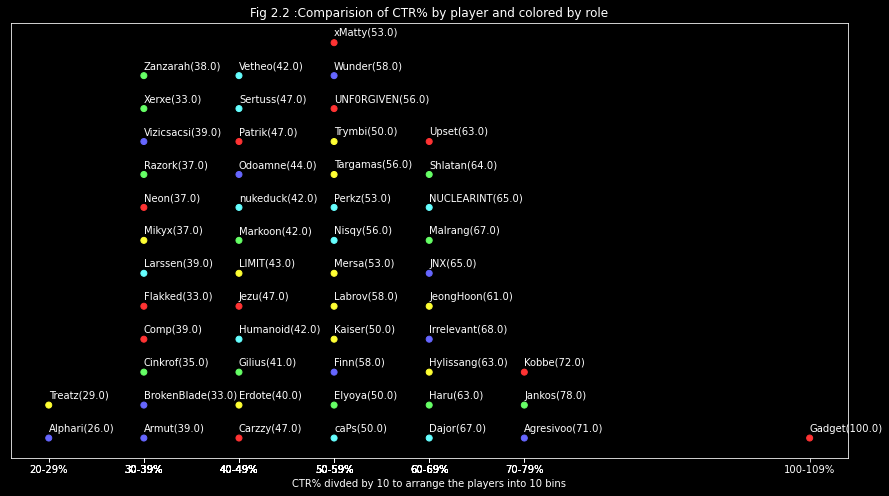

In [37]:
#Making into 2D coordinates for dot plot
#Seperating the data into bins

count_array=[0,0,0,0,0,0,0,0,0,0,0]
x_ticks = []
x_tick_labels = []
point_array_x=[]
point_array_y=[]

for ind, x in enumerate(ctr_percentages):
    val = int(x/10)
    x_ticks.append(val)
    x_tick_labels.append(str(val * 10)+ "-" +str(val*10 + 9)+"%")
    point_array_x.append(val)
    point_array_y.append(count_array[val])
    count_array[val]=count_array[val]+1
    
color_array = getColorByRole(lec_data["Pos"].tolist())
#print(color_array)

#Dot plot for CTR study

plt.clf()
plt.figure(figsize=(15,8))
plt.scatter(point_array_x,point_array_y,color=color_array)

plt.title("Fig 2.2 :Comparision of CTR% by player and colored by role")
plt.xlabel("CTR% divded by 10 to arrange the players into 10 bins")

plt.xticks(x_ticks, labels=x_tick_labels)
plt.yticks([])

for i in range(len(player_data)):
    plt.annotate(player_data[i]+"("+ str(ctr_percentages[i])+")", (point_array_x[i], point_array_y[i] + 0.2))

plt.show()

Green = Jungle,
Red = ADC,
Blue = Mid,
Yellow = Support,
Purple = Top

#### Explanation for above Fig 2.2:

In this figure, we attempt to seperate the players into bins based on their CTR%. Eg: Bin 1 = 0%-9%, Bin 2 = 10%-19%, etc. The dots on the figure are colored according to the roles of the players.

## Inference:

So we can infer from the figure that there seems to be no defined correlation between role and overall counter pick rate.

We will still check the median CTR% for each role to confirm the distribution.

In [38]:
#Group the dataset by Role
pos_group_df = lec_data.groupby('Pos')

#Caluculate median CTR% per role

print(tabulate([
    ["ADC", statistics.median(getFloatFromPercent(pos_group_df.get_group('ADC')["CTR%"]))],
    ["Jungle", statistics.median(getFloatFromPercent(pos_group_df.get_group('Jungle')["CTR%"]))],
    ["Support", statistics.median(getFloatFromPercent(pos_group_df.get_group('Support')["CTR%"]))],
    ["Top", statistics.median(getFloatFromPercent(pos_group_df.get_group('Top')["CTR%"]))],
    ["Middle", statistics.median(getFloatFromPercent(pos_group_df.get_group('Middle')["CTR%"]))],    
],headers=["Role", "Median CTR%"],tablefmt="grid"))


+---------+---------------+
| Role    |   Median CTR% |
+=========+===============+
| ADC     |          47   |
+---------+---------------+
| Jungle  |          42   |
+---------+---------------+
| Support |          50   |
+---------+---------------+
| Top     |          51   |
+---------+---------------+
| Middle  |          48.5 |
+---------+---------------+


From the above, it is seen that top has the highest median CTR% by a small margin.

## Effect of CTR on Kills, KDA, KP

Now we will try to see if there are any relationships between the CTR% and KP, KDA and Kills respectively. This is to check the speculation that a person will perform better on a champion if theirs directly counters the enemy (Sometimes champs are picked for globals but that is not considered).

#### CTR% vs Kills/ KDA/KP

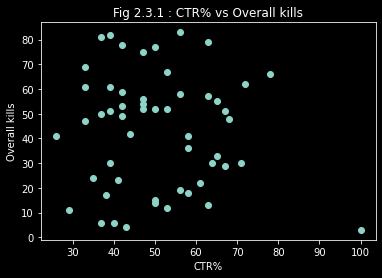

In [39]:
#CTR% vs Kills
ctr_percentages = np.array(getFloatFromPercent(lec_data["CTR%"].tolist()))
overall_kills = np.array(lec_data["K"].tolist())

plt.clf()

plt.scatter(ctr_percentages,overall_kills)

plt.xlabel("CTR%")
plt.ylabel("Overall kills")
plt.title("Fig 2.3.1 : CTR% vs Overall kills")

plt.show()

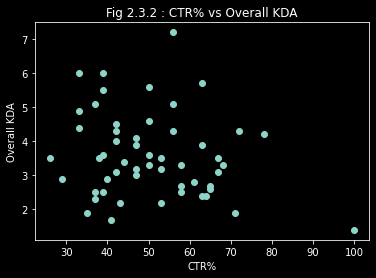

In [40]:
#CTR% vs KDA
ctr_percentages = np.array(getFloatFromPercent(lec_data["CTR%"].tolist()))
overall_kda = np.array(lec_data["KDA"].tolist())

plt.clf()

plt.scatter(ctr_percentages,overall_kda)

plt.xlabel("CTR%")
plt.ylabel("Overall KDA")
plt.title("Fig 2.3.2 : CTR% vs Overall KDA")

plt.show()

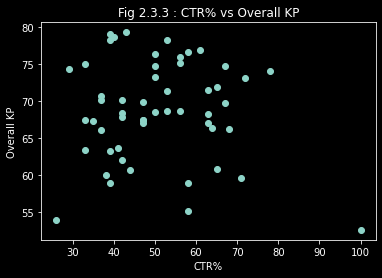

In [41]:
#CTR% vs KP%
ctr_percentages = np.array(getFloatFromPercent(lec_data["CTR%"].tolist()))
overall_kp = np.array(getFloatFromPercent(lec_data["KP"].tolist()))

plt.clf()

plt.scatter(ctr_percentages,overall_kp)

plt.xlabel("CTR%")
plt.ylabel("Overall KP")
plt.title("Fig 2.3.3 : CTR% vs Overall KP")

plt.show()

## Inferences:

From the above, it seems that the correlation between CTR% and K, KDA, KP is very weak. However, there are some other things to take into consideration:

1. The total number of kills/ Overall KDA/ KP is an overall number i.e, extends over a period where they were on a counter pick and were not on a counter pick. This might make the relationships look weaker than they are.
2. The presence of substitutes. For example, Gadget seems to have a 100% CTR rate, but he has played only 2 games total(Thus he will have a lower number of overall kills than a person who has played 18 or 19 games). So it might not be an accurate representation.

Out of the three, KDA might therefore give a closer representation since it is also a ratio.

Further analysis and fresh data might be required to confirm the relationships.



# Q3: Neutral objective - Who gets the most steals?

In this section, we will try to analyze the neutral objective stolen. We will confirm if junglers do indeed have the higher scores (since it is part of the role) and after junglers which role steals the most.

<Figure size 432x288 with 0 Axes>

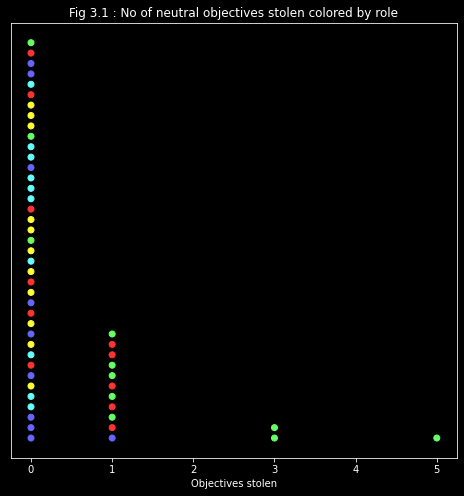

In [42]:
color_array = getColorByRole(lec_data["Pos"].tolist())

objectives_stolen = lec_data["STL"].tolist()

count_array=[0,0,0,0,0,0,0,0,0,0,0]
point_array_x=[]
point_array_y=[]

for ind, x in enumerate(objectives_stolen):
    point_array_x.append(x)
    point_array_y.append(count_array[x])
    count_array[x]=count_array[x]+1

#Plotting how many neutral objectives each player has stolen. The points are coloured according to the role of the player.
plt.clf()

plt.figure(figsize=(8,8))
plt.scatter(point_array_x,point_array_y,color=color_array)
plt.yticks([])

plt.title("Fig 3.1 : No of neutral objectives stolen colored by role")
plt.xlabel("Objectives stolen")

plt.show()

Green = Jungle,
Red = ADC,
Blue = Mid,
Yellow = Support,
Purple = Top

## Confirming Expectations/ Inferences:

From the above, it is clear that the 3 highest scores for steals are held by junglers. This is consistent with the initial premise.

For 1 steal, there is a mix of junglers, ADCs and one top laner. So, from the diagram, the role which has an impact on stealing objectives after the jungler is the ADC.

# Q4: Dmg at 15 to Damage%

Tracing the relationship between the damage to champs at 15 mins to the damage% of team to check the effect of snowballing.

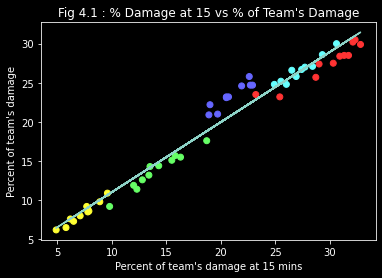

In [43]:
dmg15_array = np.array(getFloatFromPercent(lec_data["D%P15"].tolist()))
totaldmg_array = np.array(getFloatFromPercent(lec_data["DMG%"].tolist()))
color_array = getColorByRole(lec_data["Pos"].tolist())

#Plotting damage at 15 mins to damage %

plt.clf()

plt.scatter(dmg15_array,totaldmg_array,color=color_array)

plt.xlabel("Percent of team's damage at 15 mins")
plt.ylabel("Percent of team's damage")
plt.title("Fig 4.1 : % Damage at 15 vs % of Team's Damage")

slope, intercept = np.polyfit(dmg15_array, totaldmg_array, 1)
plt.plot(dmg15_array, slope*dmg15_array + intercept)

plt.show()

Green = Jungle,
Red = ADC,
Blue = Mid,
Yellow = Support,
Purple = Top

## Inferences:

Here, the relationship between dmg at 15 mins and overall damage is clear (Strong-positive). So a good start will have an advantage even in the longer games.

From the role colours, we can see that supports generally have the lower numbers, followed by jungle and top respectively. ADCs and Mid laners have the higher numbers.

# Q5 : Warding behaviour

In this section, we will attempt to study warding behaviour. We will check if:
1. Who has placed the most wards/ bought the most control wards 
2. Wards placed per min by supports correlates to win rates

<Figure size 432x288 with 0 Axes>

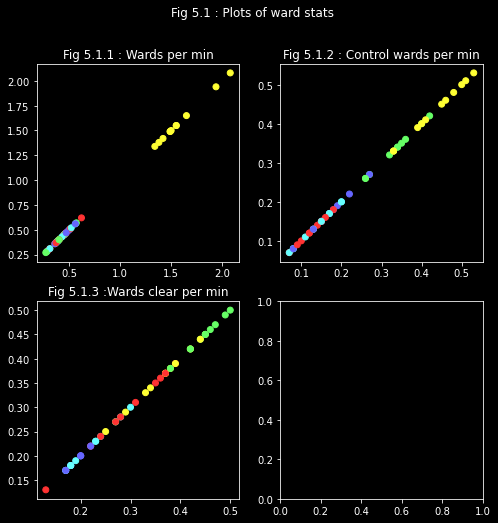

In [44]:
ward_per_min = np.array(lec_data["WPM"].tolist())
cntrl_ward_per_min = np.array(lec_data["CWPM"].tolist())
ward_clear_per_min = np.array(lec_data["WCPM"].tolist())

color_array = getColorByRole(lec_data["Pos"].tolist())

plt.clf()

#Making subplots to capture the warding behaviour. We use the same quantity for x and y just to visualize.
# 3 plots: Wards/min , Control wards/min, Ward clear/min

fig, ax = plt.subplots(2, 2,figsize=(8, 8))

ax[0][0].scatter(ward_per_min,ward_per_min,color=color_array)
ax[0][0].title.set_text("Fig 5.1.1 : Wards per min")
ax[0][1].scatter(cntrl_ward_per_min,cntrl_ward_per_min,color=color_array)
ax[0][1].title.set_text("Fig 5.1.2 : Control wards per min")
ax[1][0].scatter(ward_clear_per_min,ward_clear_per_min,color=color_array)
ax[1][0].title.set_text("Fig 5.1.3 :Wards clear per min")

fig.suptitle("Fig 5.1 : Plots of ward stats")


plt.show()

Green = Jungle,
Red = ADC,
Blue = Mid,
Yellow = Support,
Purple = Top

In the above, we just try to make plots related to warding behaviour and try to see which roles do them the most. Here, the X and y axis are the same variables. They are plotted that way just to visualize.

### Inferences:

- From the above, it is clear that supports place the most wards as the upper half of wards per minute is composed entirely of supports. This is within expectations as warding is an important job of the role.
- For control wards per min, junglers and supports have the highest numbers. This may be due to the supports having to take care of warding and junglers needing vision inside the jungle.
- However it is interesting that placing control wards has a mixed population of junglers and supports, whereas for normal wards (which are available to all) supports have the clear higher numbers. This could be attributed to the support quest granting additional wards and some items allowing supports to store additional control wards.

# Results Analysis

Now, let us analyze the Groups stage data in combination with the results data. The data for the results of the Groups stage and the Playoffs data is stored in a different excel.

## Q6. How many of the players qualified to Worlds hold top stats

We have isolated the top stats of the players in the first part of the analysis. Now we will compare them with the results. The percentage of top stats that are held by players qualified to Worlds is calculated using the player data and the results data.

In [45]:
#Read the data from the csv file
results_data = pd.read_csv("LECSummer2022Results.csv")
print("Type of the dataset:", type(lec_data))
display(HTML(results_data.to_html()))

print(results_data.shape)

Type of the dataset: <class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,Team,TeamFull,Games,Wins,Losses,Pts,Diff,FinalRank,Qualified,Prize
0,1,AST,AST Astralis,18,7,11,21,-4,NaN,NaN,NaN
1,2,BDS,BDS Team BDS,18,3,15,9,-12,NaN,NaN,NaN
2,3,FNC,FNC Fnatic,18,10,8,30,2,3.0,World Championship 2022,"$31,499"
3,4,G2,G2 G2 eSports,18,12,6,36,6,2.0,World Championship 2022,"$52,499"
4,5,MAD,MAD MAD Lions,18,12,6,36,6,4.0,NaN,"$21,000"
5,6,MSF,MSF Misfits Gaming,18,10,8,30,2,5.0,NaN,"$14,175"
6,7,RGE,RGE Rogue,18,11,7,33,4,1.0,World Championship 2022,"$83,998"
7,8,SK,SK SK Gaming,18,7,11,21,-4,NaN,NaN,NaN
8,9,VIT,VIT Team Vitality,18,9,9,27,0,NaN,NaN,NaN
9,10,XL,XL EXCEL,18,9,9,27,0,6.0,NaN,"$6,825"


(10, 11)


In [46]:
#Remove the games played top stat because it is common for a lot of players
top_stats_to_check = list(top_stats)
top_stats_to_check.pop(0)

['GP',
 'Max',
 'Alphari, Carzzy, Finn, Haru, Humanoid, Hylissang, Irrelevant\n, Labrov, Markoon, Mersa, Mikyx, Neon, nukeduck\n, Patrik, Perkz, Razork, Upset, Vetheo, Wunder\n']

In [47]:
#Percentage of players in Worlds Qualified teams that got top stats

winning_teams = results_data[results_data.eq("World Championship 2022").any(axis=1)]["TeamFull"].tolist()
temp_winning_teams = []
for x in winning_teams:
    temp = x.split()
    temp.pop(0)
    temp_winning_teams.append(' '.join(temp))
winning_teams = temp_winning_teams

#Find which team the players with top stats belong to using the player data

players_in_qual_teams = []
for x in top_stats_to_check:
    player_name = x[2]
    team_name = lec_data[lec_data.eq(player_name).any(axis=1)].iloc[0]["Team"]
    if(team_name.lower() in (name.lower() for name in winning_teams)):
        players_in_qual_teams.append([player_name,team_name])

#Divide the top stats by qualified players by total number of top stats to get the %
total_stats_checked = len(top_stats_to_check)
print("Number of top stats we consider:" ,total_stats_checked)
qual_top_checked = len(players_in_qual_teams)
print("Number of players that have achieved a top stats and have been qualified for worlds (with repetition)", qual_top_checked)
print("Percentage of top stats that have been achieved by qualified players", qual_top_checked/total_stats_checked *100)
print("Qualified players that have achieved top stats:")
print(tabulate(players_in_qual_teams, headers=["PLAYER", "TEAM"],tablefmt="grid"))

Number of top stats we consider: 22
Number of players that have achieved a top stats and have been qualified for worlds (with repetition) 7
Percentage of top stats that have been achieved by qualified players 31.818181818181817
Qualified players that have achieved top stats:
+----------+------------+
| PLAYER   | TEAM       |
+==========+============+
| Targamas | G2 Esports |
+----------+------------+
| Targamas | G2 Esports |
+----------+------------+
| Upset    | Fnatic     |
+----------+------------+
| Upset    | Fnatic     |
+----------+------------+
| Razork   | Fnatic     |
+----------+------------+
| Comp     | Rogue      |
+----------+------------+
| Upset    | Fnatic     |
+----------+------------+


### Inference
Thus, we can see that ~32% of the top stats are held by players that qualified to worlds. Usually, the top 3 teams in the playoffs are the ones qualified to worlds.

## Q7. Comparing the performance at groups stage and the performance at playoffs

In this section, we will compare the number of wins of a team at the groups stage with their position at playoffs. The Playoffs are the final knock-out stage held after groups.

<Figure size 432x288 with 0 Axes>

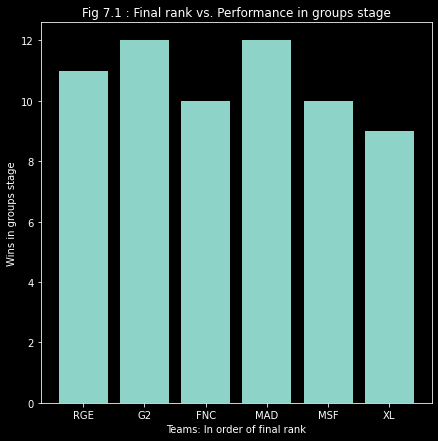

In [48]:
final_teams = results_data[~results_data["FinalRank"].isna()]
groups_wins = np.array(final_teams["Wins"].tolist())
final_rank = np.array(final_teams["FinalRank"].tolist())

#Arrange the teams in x axis based on the final rank
#Plot the numbers of wins in groups stage as the bars

plt.clf()

plt.figure(figsize=(7,7))

plt.bar(final_rank, groups_wins)

x_labels = []
for ind, t in final_teams.iterrows():
    x_labels.append(final_teams.loc[ind, "Team"])

plt.xticks(ticks = final_rank, labels=x_labels)
plt.xlabel("Teams: In order of final rank")
plt.ylabel("Wins in groups stage")
plt.title("Fig 7.1 : Final rank vs. Performance in groups stage")

plt.show()

In the above graph, the teams are ordered on the x-axis based on their final rank after playoffs.

## Inference

Thus, from the above, we can see that higher winrate at the groups stage doesn't necessarily mean that the team will perform in the same manner in playoffs.


# Stream Analysis

The following is an analysis on the twitch stream data during the period of the LEC Summer 2022 split.

In [49]:
#Read the data from the csv file
stream_data = pd.read_csv("LECSummer2022Streams.csv")
print("Type of the dataset:", type(lec_data))
display(HTML(stream_data.tail(10).to_html()))

print(stream_data.shape)

Type of the dataset: <class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,Stream,Duration,AVG.CCV,MAX.CCV,Followers,Title,teams
41,42,2022-09-02 14:19,295,86952,144648,2664,MSF vs. FNC | Playoffs Round 2 | 2022 LEC Summer,MSF vs FNC
42,43,2022-09-03 03:59,235,11421,17499,402,(REBROADCAST) MSF vs. FNC | Playoffs Round 2 | 2022 LEC Summer,MSF vs FNC
43,44,2022-09-03 13:15,289,92953,166440,3002,G2 vs. RGE | Playoffs Round 2 | 2022 LEC Summer,G2 vs RGE
44,45,2022-09-04 00:18,226,16455,28403,429,(REBROADCAST) G2 vs. RGE | Playoffs Round 2 | 2022 LEC Summer,G2 vs RGE
45,46,2022-09-04 13:19,335,105860,185997,3651,MAD vs. FNC | Playoffs Round 2 | 2022 LEC Summer,MAD vs FNC
46,47,2022-09-05 01:08,256,13173,26093,419,(REBROADCAST) MAD vs. FNC | Playoffs Round 2 | 2022 LEC Summer,MAD vs FNC
47,48,2022-09-10 13:01,393,133844,218383,6856,Semifinals: FNC vs RGE | 2022 LEC Summer,FNC vs RGE
48,49,2022-09-11 01:28,336,4339,6232,418,(REBROADCAST) Semifinals: FNC vs RGE | 2022 LEC Summer,FNC vs RGE
49,50,2022-09-11 10:00,544,133842,344058,12715,2022 LEC Summer - Finals: Warm-Up,G2 vs RGE
50,51,2022-09-11 23:44,300,11982,29839,502,(REBROADCAST) Finals: G2 vs RGE | 2022 LEC Summer,G2 vs RGE


(51, 8)


## Q8. Plot and study the avg/max concurrent viewers for the LEC Summer Twitch streams

In the section below, we will plot the average and maximum concuurent viewers for the LEC Summer 2022 Twitch streams. The list of streams includes streams from both groups stage and playoffs stage. It also includes the rebroadcasts for all the matches (usually the match is in the evening and the rebroadcast stream is done the next day in the morning).

<Figure size 432x288 with 0 Axes>

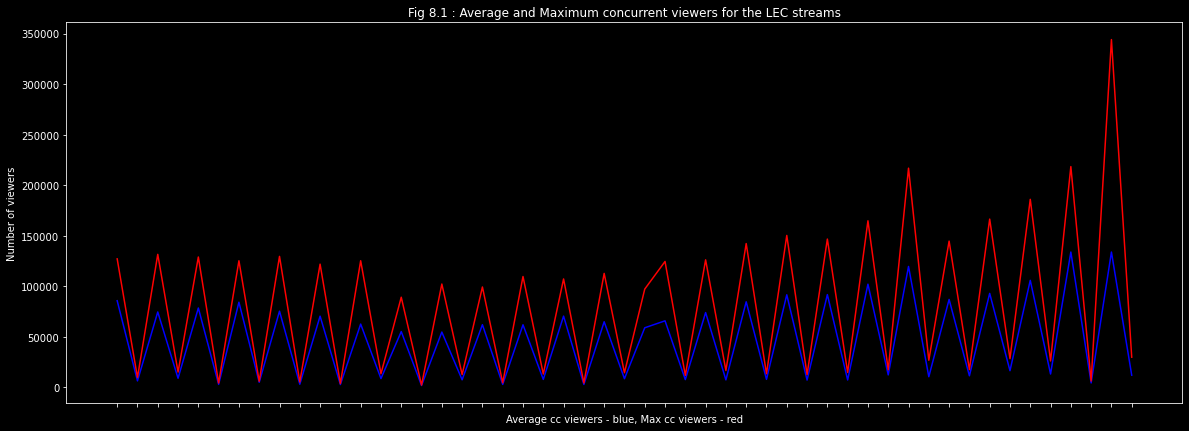

In [50]:
plt.clf()

date_array = np.array(stream_data["Stream"].tolist())
avg_ccv_array = np.array(stream_data["AVG.CCV"].tolist())
max_ccv_array = np.array(stream_data["MAX.CCV"].tolist())

#Plot two line graphs. One for average concurrent views. Another for maximum concurrent views.

plt.figure(figsize=(20,7))
plt.plot(date_array,avg_ccv_array,color="blue")
plt.plot(date_array,max_ccv_array,color="red")

plt.xticks(date_array,labels=[])

plt.title("Fig 8.1 : Average and Maximum concurrent viewers for the LEC streams")

plt.xlabel("Average cc viewers - blue, Max cc viewers - red")
plt.ylabel("Number of viewers")

plt.show()

In the above, we plot the streams according to the date, but we remove the labels to make it easier to read. Also the scale on the x axis is not an exact representation of the time difference between each stream. The streams are usually on the Fridays and weekends, and the gap between each stream is ignored while plotting

### Inferences

- The lower points on the graph represent the rebroadcast streams for the matches. The viewership for rebroadcasts and significantly lower than the live events.
- The finals shows a distinct peak in the maximum number of viewers watching, even though the average number of viewers follows the trend.

## Q9. Which team has the highest average/maximum number of viewers per match

In this section, we will analyze which teams have the highest average/maximum number of viewers per match played.

Note: To calculate the number of viewers, if two teams are playing, we will add the number of viewers that day to both the teams total.

For this section, we will only be using the live and rebroadcast streams from the playoffs stage as those are the only streams which have the team names in the title. Therefore, we will be doing this analysis only for the 6 playoffs teams.


In [51]:
#Check which team has the highest average/maximum number of viewers
final_teams = results_data[~results_data["FinalRank"].isna()]
final_team_names = np.array(final_teams["Team"].tolist())

streams_of_final_teams = stream_data[~stream_data["teams"].isna()]

#Initialize dictionaries
total_avg_views = {
    "RGE": 0,
    "G2": 0,
    "FNC": 0,
    "MAD":0,
    "MSF":0,
    "XL":0
}

total_max_views = {
    "RGE": 0,
    "G2": 0,
    "FNC": 0,
    "MAD":0,
    "MSF":0,
    "XL":0
}

no_of_streams = {
    "RGE": 0,
    "G2": 0,
    "FNC": 0,
    "MAD":0,
    "MSF":0,
    "XL":0
}

#Whenever the team has played a match, add the viewcount to their dictionaries and 
#also increment the number of matches played by the team

for ind, x in streams_of_final_teams.iterrows():
    teams_playing = streams_of_final_teams.loc[ind,"teams"]
    for team in final_team_names:
        if(team in teams_playing):
            total_avg_views[team] = total_avg_views[team] + streams_of_final_teams.loc[ind,"AVG.CCV"]
            total_max_views[team] = total_max_views[team] + streams_of_final_teams.loc[ind,"MAX.CCV"]
            no_of_streams[team] = no_of_streams[team] + 1

print(total_avg_views)
print(total_max_views)
print(no_of_streams)

{'RGE': 492429, 'G2': 369607, 'FNC': 485683, 'MAD': 218047, 'MSF': 212748, 'XL': 130094}
{'RGE': 954707, 'G2': 750808, 'FNC': 842462, 'MAD': 373442, 'MSF': 344215, 'XL': 243610}
{'RGE': 8, 'G2': 6, 'FNC': 8, 'MAD': 4, 'MSF': 4, 'XL': 2}


In [52]:
#Make lists in order to plot easily

team_names = ["RGE","G2","FNC","MAD","MSF","XL"]
avg_views_per_match = [
    total_avg_views["RGE"]/no_of_streams["RGE"],
    total_avg_views["G2"]/no_of_streams["G2"],
    total_avg_views["FNC"]/no_of_streams["FNC"],
    total_avg_views["MAD"]/no_of_streams["MAD"],
    total_avg_views["MSF"]/no_of_streams["MSF"],
    total_avg_views["XL"]/no_of_streams["XL"],
]

max_views_per_match = [
    total_max_views["RGE"]/no_of_streams["RGE"],
    total_max_views["G2"]/no_of_streams["G2"],
    total_max_views["FNC"]/no_of_streams["FNC"],
    total_max_views["MAD"]/no_of_streams["MAD"],
    total_max_views["MSF"]/no_of_streams["MSF"],
    total_max_views["XL"]/no_of_streams["XL"],
]

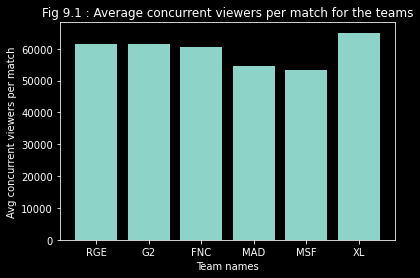

In [53]:
plt.clf()

plt.bar(team_names, avg_views_per_match)

plt.title("Fig 9.1 : Average concurrent viewers per match for the teams")
plt.xlabel("Team names")
plt.ylabel("Avg concurrent viewers per match")

plt.show()

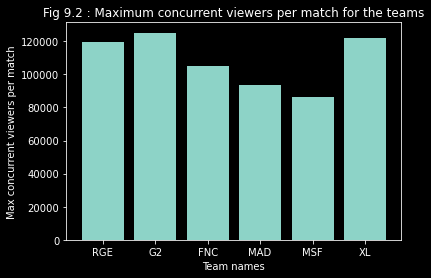

In [54]:
plt.clf()

plt.bar(team_names, max_views_per_match)

plt.title("Fig 9.2 : Maximum concurrent viewers per match for the teams")
plt.xlabel("Team names")
plt.ylabel("Max concurrent viewers per match")

plt.show()

## Inferences
We can see from the above that the ranking of the teams did not have an impact on the viewership. For example, XL who is 6th has the highest numbers for viewership.

### This concludes the analysis on the player data, results and stream data of the 2022 Summer split of LEC